<a href="https://colab.research.google.com/github/dimaszuda/Pistachio-Classification/blob/main/Pistachio_using_simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
import os
import numpy as np
import splitfolders
from PIL import Image
import tensorflow as tf
from google.colab import files
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
upload_files = files.upload()
dataset = list(upload_files.keys())[0]

Saving archive_3.zip to archive_3.zip


In [ ]:
!unzip archive_3.zip

In [ ]:
os.listdir('/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset')

['Siirt_Pistachio', 'Kirmizi_Pistachio']

In [ ]:
os.listdir('/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio')

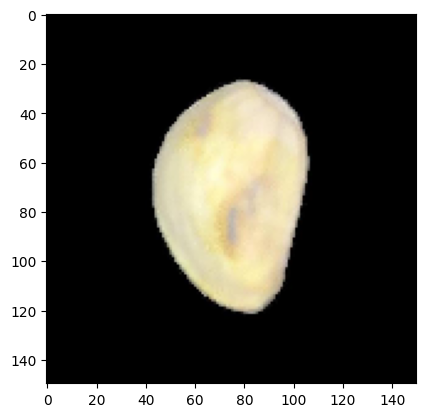

In [ ]:
img_path = r'/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/siirt 114.jpg'
img = image.load_img(img_path, target_size=(150, 150))
imgplot = plt.imshow(img)

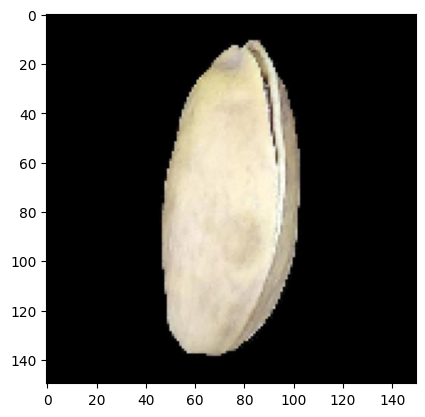

In [ ]:
img_path = r'/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 450.jpg'
img = image.load_img(img_path, target_size=(150, 150))
imgplot = plt.imshow(img)

In [ ]:
dataset = '/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset'
data = '/content/data-split'

In [ ]:
os.makedirs(data, exist_ok=True)

In [ ]:
splitfolders.fixed(dataset, output=data, fixed=(100, 10))

Copying files: 2148 files [00:00, 3321.49 files/s]


In [ ]:
base_dir = '/content/data-split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
class_name = ['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    classes=class_name,
    target_size=(150,150), #mengubah resolusi seluruh image
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    classes=class_name,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)


Found 1928 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=class_name,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 20 images belonging to 2 classes.


(32, 150, 150, 3)


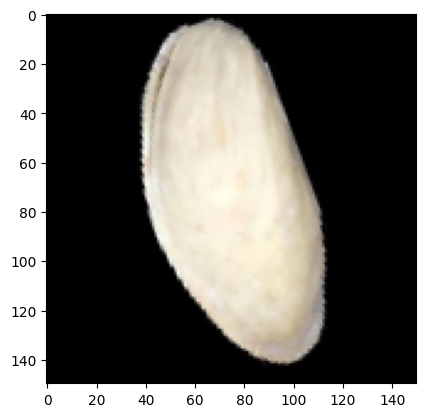

(32, 150, 150, 3)


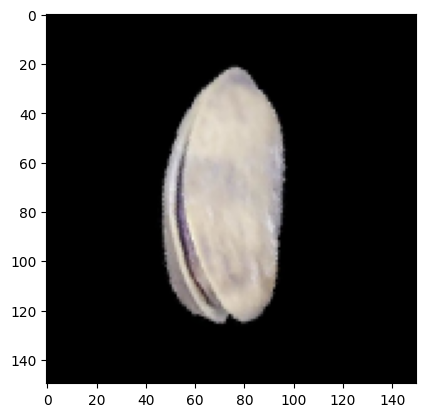

In [ ]:
for _ in range(2):
  img, label = train_generator.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()

In [ ]:
def build_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3, 3),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3, 3),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3, 3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid') #GANTI JADI SIGMOID NDERR,
      # SOFTMAX? YANG BENER AJE? RUGI DONG!!!
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(
      loss='binary_crossentropy',
      metrics=['accuracy'],
      optimizer='adam'
  )
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      print(logs)
      if(logs.get('accuracy')>0.87):
          print("/nReached 89% accuracy so cancelling training!")
          self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs=30,
    validation_data=val_generator,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/30
{'loss': 0.6951795220375061, 'accuracy': 0.5600000023841858, 'val_loss': 0.6819547414779663, 'val_accuracy': 0.5149999856948853}
25/25 - 32s - loss: 0.6952 - accuracy: 0.5600 - val_loss: 0.6820 - val_accuracy: 0.5150 - 32s/epoch - 1s/step
Epoch 2/30
{'loss': 0.6041374802589417, 'accuracy': 0.6850000023841858, 'val_loss': 0.6793910264968872, 'val_accuracy': 0.5550000071525574}
25/25 - 28s - loss: 0.6041 - accuracy: 0.6850 - val_loss: 0.6794 - val_accuracy: 0.5550 - 28s/epoch - 1s/step
Epoch 3/30
{'loss': 0.5866377353668213, 'accuracy': 0.6894329786300659, 'val_loss': 0.5994330048561096, 'val_accuracy': 0.6850000023841858}
25/25 - 28s - loss: 0.5866 - accuracy: 0.6894 - val_loss: 0.5994 - val_accuracy: 0.6850 - 28s/epoch - 1s/step
Epoch 4/30
{'loss': 0.5651990175247192, 'accuracy': 0.7250000238418579, 'val_loss': 0.6095230579376221, 'val_accuracy': 0.6650000214576721}
25/25 - 28s - loss: 0.5652 - accuracy: 0.7250 - val_loss: 0.6095 - val_accuracy: 0.6650 - 28s/epoch - 1s/step


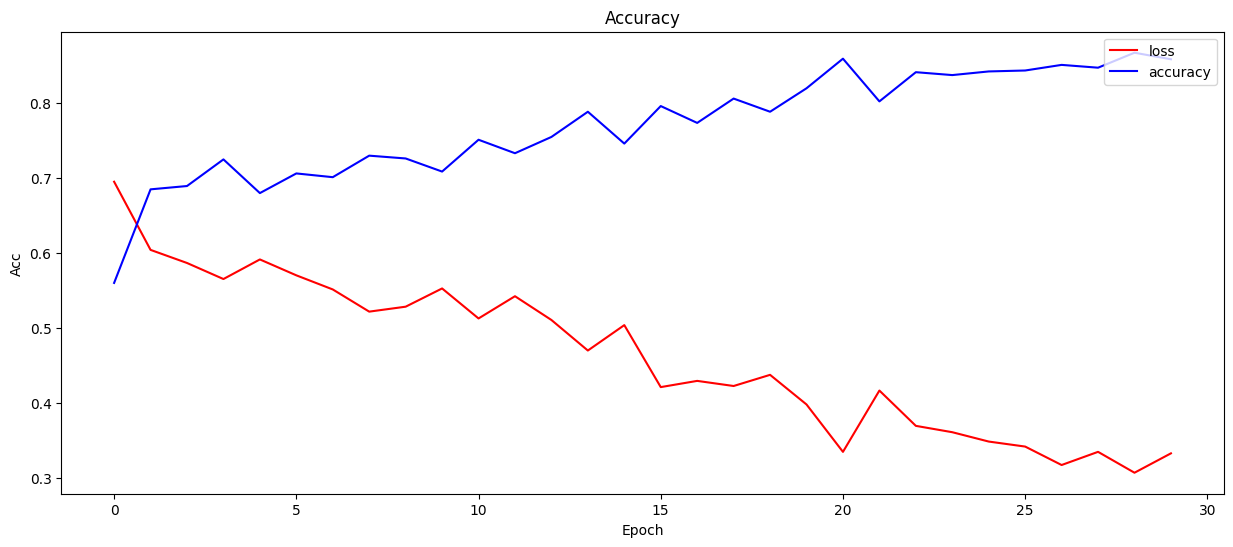

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['accuracy'], 'b')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"This is loss: {loss}")
print(f"This is Accuracy: {accuracy}")

1/1 [==============================] - 0s 235ms/step - loss: 0.2158 - accuracy: 0.9500
This is loss: 0.21575108170509338
This is Accuracy: 0.949999988079071


Saving siirt pistachio.jfif to siirt pistachio (2).jfif
1/1 [==============================] - 0s 67ms/step
[[0.]]


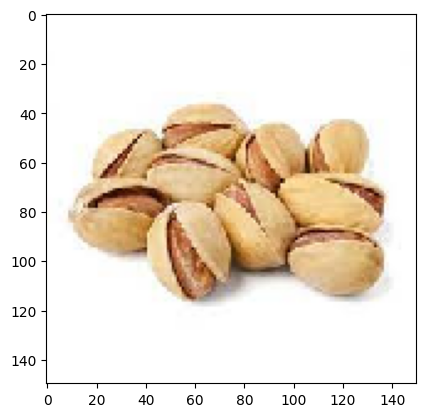

In [ ]:
upload_test = files.upload()
for fn in upload_test.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes)

In [ ]:
upload_test = files.upload()
path = list(upload_test.keys())[0]

Saving kirmizi-kabuklu-antep-fistigi-287.webp to kirmizi-kabuklu-antep-fistigi-287.webp


In [ ]:
img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))
img_arr = tf.keras.preprocessing.image.img_to_array(img)
img_arr = np.array([img_arr])

In [ ]:
predictions = model.predict(img_arr)
print(predictions)

1/1 [==============================] - 0s 29ms/step
[[0.]]


In [ ]:
int(predictions[0])

0

In [ ]:
class_id = int(predictions[0])
print(class_id)

0


In [ ]:
class_name[class_id]

'Kirmizi_Pistachio'